# <center> [INDICIUM] - Processo Seletivo - Lighthouse Programa de Formação em Dados (Remoto) </center>

## <center> Descrição Gráfica do Dados e Análise Descritiva </center>

## <center> Exploratory Data Analysis (EDA) </center>

In [1]:
#Import das libs necessárias no projeto
import pandas as pd
import seaborn as sn
import numpy as np 
import math
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from pandasql import sqldf
from scipy import stats

In [2]:
#Ler os dados do csv e transformar em um dataframe para possibilitar a sua manipulação
df_treino = pd.read_csv("./desafio_manutencao_preditiva_treino.csv")
df_teste = pd.read_csv("./desafio_manutencao_preditiva_teste.csv")

### As análises serão realizadas no conjunto de dados de treino

### Parte I - Informações básicas sobre o dataset

Overview do dataset: O objetivo é analisar visualmente o tipo de dados e as colunas.

In [3]:
df_treino

,udi,product_id,type,air_temperature_k,process_temperature_k,rotational_speed_rpm,torque_nm,tool_wear_min,failure_type
0,1,M14860,M,298.1,308.6,1551,42.8,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,No Failure
2,5,L47184,L,298.2,308.7,1408,40.0,9,No Failure
3,6,M14865,M,298.1,308.6,1425,41.9,11,No Failure
4,7,L47186,L,298.1,308.6,1558,42.4,14,No Failure
...,...,...,...,...,...,...,...,...,...
6662,9995,L57174,L,298.8,308.3,1634,27.9,12,No Failure
6663,9996,M24855,M,298.8,308.4,1604,29.5,14,No Failure
6664,9997,H39410,H,298.9,308.4,1632,31.8,17,No Failure
6665,9999,H39412,H,299.0,308.7,1408,48.5,25,No Failure


Ao usar a função Info() é mostrado é quantidade de dados e informações básicas em relação as colunas tais como o nome, o tipo de dado e a quantidade de nulos. Verifica-se que não há valores nulos e que o dataset é heterogênio em relação ao tipo de dado tendo em vista que tem valores inteiros, ponto flutuante e object (refere-se as colunas com dados categóricos: product_id, Type, failure_type).

In [4]:
#resumo de valores não nulos encontrados
print(df_treino.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6667 entries, 0 to 6666
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   udi                    6667 non-null   int64  
 1   product_id             6667 non-null   object 
 2   type                   6667 non-null   object 
 3   air_temperature_k      6667 non-null   float64
 4   process_temperature_k  6667 non-null   float64
 5   rotational_speed_rpm   6667 non-null   int64  
 6   torque_nm              6667 non-null   float64
 7   tool_wear_min          6667 non-null   int64  
 8   failure_type           6667 non-null   object 
dtypes: float64(3), int64(3), object(3)
memory usage: 468.9+ KB
None


#### Estatisticas básicas em relação aos dados

a) Quantidade de Produto por tipo

Foi escolhido o gráfico de pizza, nesse caso ele pode ser utilizado por ter apenas três tipos de produto. Se houvesse mais categorias era indicado outro tipo de visualização para não ficar poluído.

Pelo gráfico abaixo percebe-se que a maior quantidade de tipo de produto é do tipo L com 59,3% dos dados, seguido do tipo M com 30,3% dos dados. 

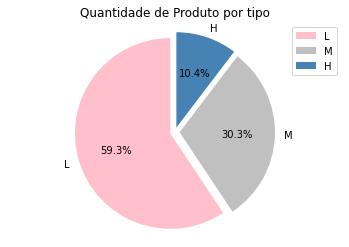

In [5]:
labels = ['L', 'M', 'H']
values = [df_teste['type'].value_counts()[0], df_teste['type'].value_counts()[1], df_teste['type'].value_counts()[2]]
colors = ['pink', 'silver', 'steelblue']
explode = (0.05, 0.05, 0.05)
plt.pie(values, labels=labels, autopct='%1.1f%%', colors=colors, startangle = 90, explode=explode)
plt.title('Quantidade de Produto por tipo')
plt.axis('equal')
plt.legend()
plt.show()

b) Quantidade de Falha por tipo

In [6]:
#Listar os tipos de falhas existentes na base de dados
df_treino['failure_type'].unique()

array(['No Failure', 'Power Failure', 'Tool Wear Failure',
       'Overstrain Failure', 'Random Failures',
       'Heat Dissipation Failure'], dtype=object)

In [7]:
#Contar a quantidade de falhas existentes por tipo
df_treino["failure_type"].value_counts()

No Failure                  6435
Heat Dissipation Failure      75
Power Failure                 63
Overstrain Failure            52
Tool Wear Failure             30
Random Failures               12
Name: failure_type, dtype: int64

Percebe-se que 'No Failure' (Não há falhas) tem a maior quantidade um total de 6435 ocorrências. 

A menor ocorrência são as falhas randômicas (as que ocorrem sem um motivo definido) aparecendo um total de 12 vezes.

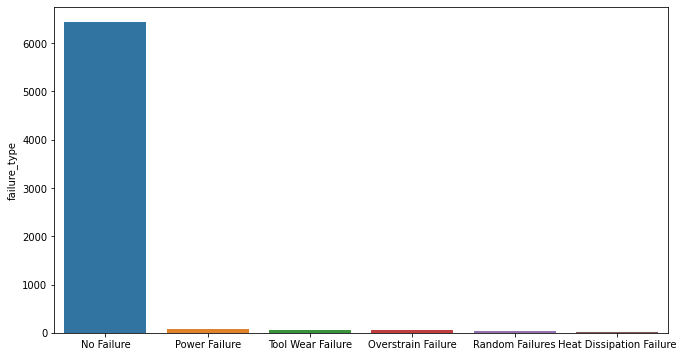

In [8]:
values = df_treino["failure_type"].value_counts()
labels = ["No Failure", 'Power Failure', 'Tool Wear Failure', 'Overstrain Failure',
         'Random Failures', 'Heat Dissipation Failure']

plt.figure(figsize=(11, 6))

sn.barplot(x = labels,
            y = values)
 
# Show the plot
plt.show()

O Gráfico acima mostra graficamente os tipos de falhas ocorridas no conjunto de dados. Percebe-se claramente a discrepância em relação aos dados.

c) Temperatura do Processo Agrupudado por Tipo de Produto

type
H    AxesSubplot(0.125,0.125;0.775x0.755)
L    AxesSubplot(0.125,0.125;0.775x0.755)
M    AxesSubplot(0.125,0.125;0.775x0.755)
Name: process_temperature_k, dtype: object

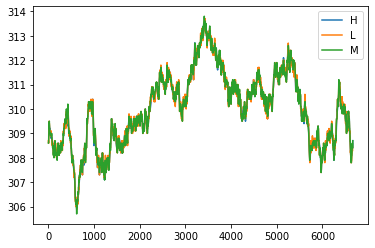

In [9]:
df_treino.groupby('type')['process_temperature_k'].plot(legend=True)

d) Temperatura do Processo Agrupudado por Tipo de Falha

failure_type
Heat Dissipation Failure    AxesSubplot(0.125,0.125;0.775x0.755)
No Failure                  AxesSubplot(0.125,0.125;0.775x0.755)
Overstrain Failure          AxesSubplot(0.125,0.125;0.775x0.755)
Power Failure               AxesSubplot(0.125,0.125;0.775x0.755)
Random Failures             AxesSubplot(0.125,0.125;0.775x0.755)
Tool Wear Failure           AxesSubplot(0.125,0.125;0.775x0.755)
Name: process_temperature_k, dtype: object

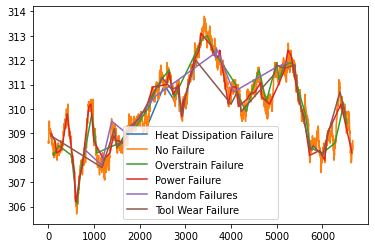

In [10]:
df_treino.groupby('failure_type')['process_temperature_k'].plot(legend=True)

e) Uma informação relevante é agrupar a quantidade de tipo de produto por tipo de falha existente. 

Percebe-se que o tipo de falha Heat Dissipation Failure tem maior ocorrência no Tipo de Produto L e Power Failure  no tipo de Produto M.

In [11]:
data = df_treino.groupby(["type", "failure_type"]).size()
data

type  failure_type            
H     Heat Dissipation Failure       7
      No Failure                   641
      Overstrain Failure             1
      Power Failure                  4
      Random Failures                4
      Tool Wear Failure              1
L     Heat Dissipation Failure      46
      No Failure                  3861
      Overstrain Failure            50
      Power Failure                 39
      Random Failures                7
      Tool Wear Failure             19
M     Heat Dissipation Failure      22
      No Failure                  1933
      Overstrain Failure             1
      Power Failure                 20
      Random Failures                1
      Tool Wear Failure             10
dtype: int64

### Parte II - Distribuição e Correlação entre os dados

In [12]:
df_treino.describe()

,udi,air_temperature_k,process_temperature_k,rotational_speed_rpm,torque_nm,tool_wear_min
count,6667.000000,6667.000000,6667.000000,6667.000000,6667.000000,6667.000000
mean,4994.589921,299.992515,309.992620,1537.419529,40.058512,108.098095
std,2896.125718,1.994710,1.488101,177.182908,9.950804,63.359915
min,1.000000,295.300000,305.700000,1168.000000,3.800000,0.000000
25%,2496.500000,298.300000,308.800000,1422.500000,33.200000,54.000000
50%,4983.000000,300.000000,310.000000,1503.000000,40.200000,108.000000
75%,7510.500000,301.500000,311.100000,1612.000000,46.800000,162.000000
max,10000.000000,304.500000,313.800000,2886.000000,76.600000,251.000000


O próximo passo foi utilizar a função describe() para descrever as principais estatisticas básicas em relação ao Dataset. Com isso temos as seguintes informações: 

1. Count: Número de dados não nulos na coluna.
2. Mean: Média da coluna.
3. Std: Desvio padrão
4. Min: Menor valor
4. 25%: 25 percentil
5. 50%: 50 percentil
6. 75%: 75 percentil
7. Max: Valor máximo

#### 1) Histograma

<AxesSubplot:xlabel='process_temperature_k', ylabel='Count'>

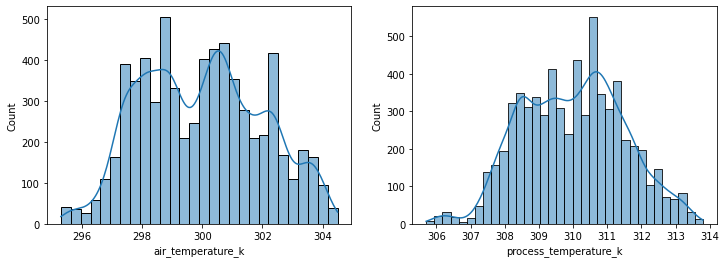

In [13]:
fig, ax = plt.subplots(1,2)
width, height = fig.get_size_inches()
fig.set_size_inches(width*2, height)
sn.histplot(df_treino['air_temperature_k'], ax=ax[0], kde=True)
sn.histplot(df_treino['process_temperature_k'], ax=ax[1], kde=True)

<AxesSubplot:xlabel='rotational_speed_rpm', ylabel='Count'>

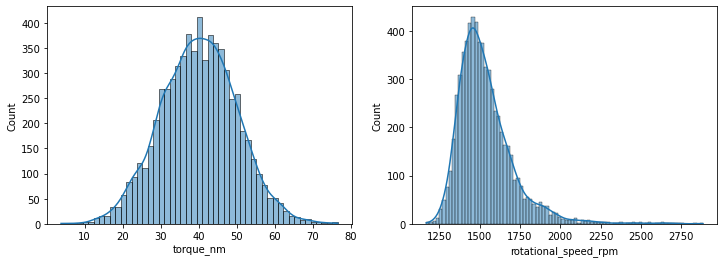

In [14]:
fig, ax = plt.subplots(1,2)
width, height = fig.get_size_inches()
fig.set_size_inches(width*2, height)
sn.histplot(df_treino['torque_nm'], ax=ax[0], kde=True)
sn.histplot(df_treino['rotational_speed_rpm'], ax=ax[1], kde=True)

#### 2. Gráfico de Dispersão

Gráfico de dispersão para analisar se existe uma relação entre causa e efeito entre duas variáveis numéricas.

A relação entre duas variáveis pode ser positiva, negativa ou neutra, linear ou não linear.

O gráfico de dispersão não mostra apenas o valor individualmente, mas mostra os dados como um todo. Sendo útil para identificar outro padrões nos dados, como outlier (pontos extremos) ou possíveis grupos entre os dados.

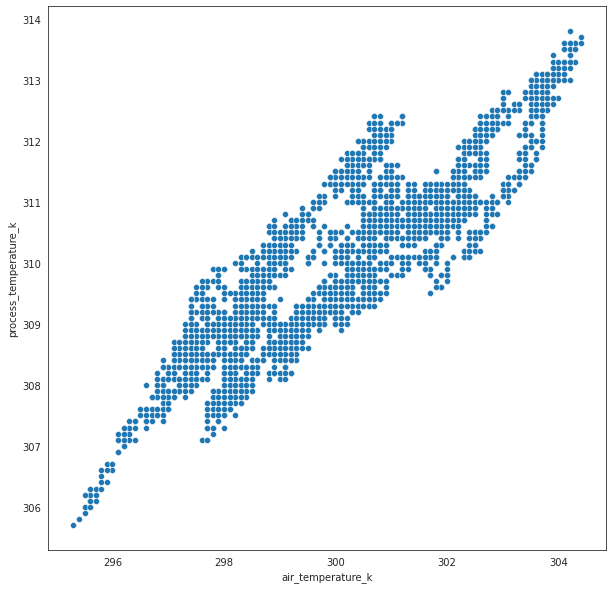

In [15]:
# Criando o ambiente do gráfico 
sn.set_style("white")
plt.figure(figsize=(10, 10))

# Gráfico de Dispersão
g = sn.scatterplot(x="air_temperature_k", y="process_temperature_k", data=df_teste)
plt.show()

#### 3. BoxPlot

<AxesSubplot:xlabel='type', ylabel='air_temperature_k'>

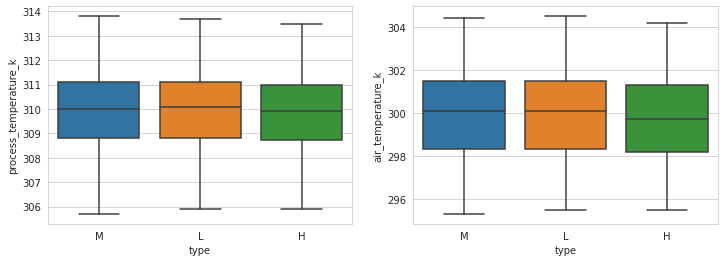

In [16]:
sn.set_style("whitegrid")
fig, ax = plt.subplots(1,2)
width, height = fig.get_size_inches()
fig.set_size_inches(width*2, height)
sn.boxplot(x = df_treino['type'], y = df_treino['process_temperature_k'], data = df_treino, ax=ax[0])
sn.boxplot(x = df_treino['type'], y = df_treino['air_temperature_k'], data = df_treino, ax=ax[1])

<AxesSubplot:xlabel='type', ylabel='torque_nm'>

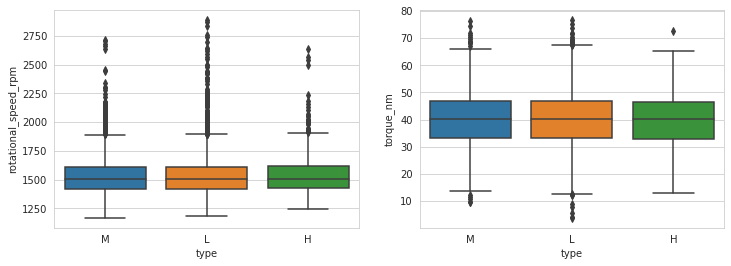

In [17]:
sn.set_style("whitegrid")
fig, ax = plt.subplots(1,2)
width, height = fig.get_size_inches()
fig.set_size_inches(width*2, height)
sn.boxplot(x = df_treino['type'], y = df_treino['rotational_speed_rpm'], data = df_treino, ax=ax[0])
sn.boxplot(x = df_treino['type'], y = df_treino['torque_nm'], data = df_treino, ax=ax[1])

#### 4. Correlação entre os dados ###

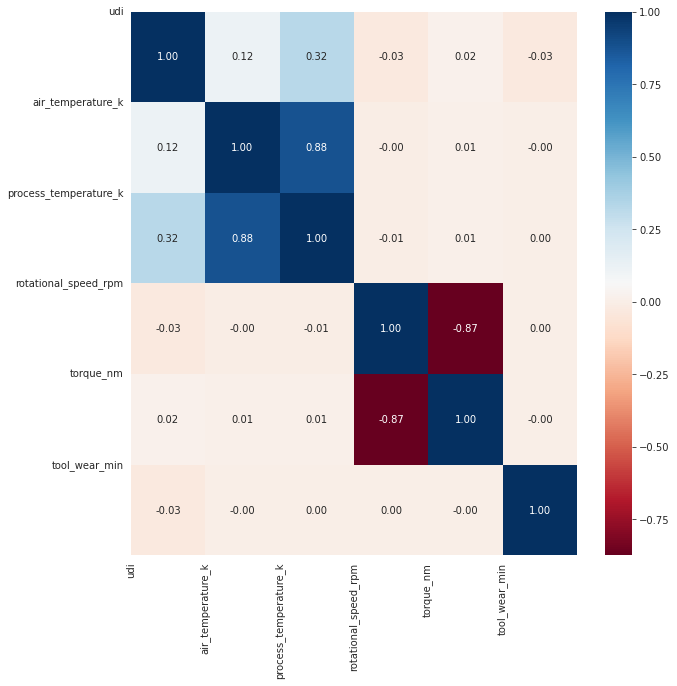

In [18]:
corr = df_teste.corr()
fig, ax = plt.subplots(figsize=(10, 10))
sn.heatmap(corr, cmap='RdBu', annot=True, fmt=".2f")
plt.xticks(range(len(corr.columns)), corr.columns);
plt.yticks(range(len(corr.columns)), corr.columns)
plt.show()

#### 5. Distribuições bivariadas

O objetivo é mostrar graficamente a relação para (n, 2) combinação das variáveis do conjunto de dados e demonstrar sua correlação.

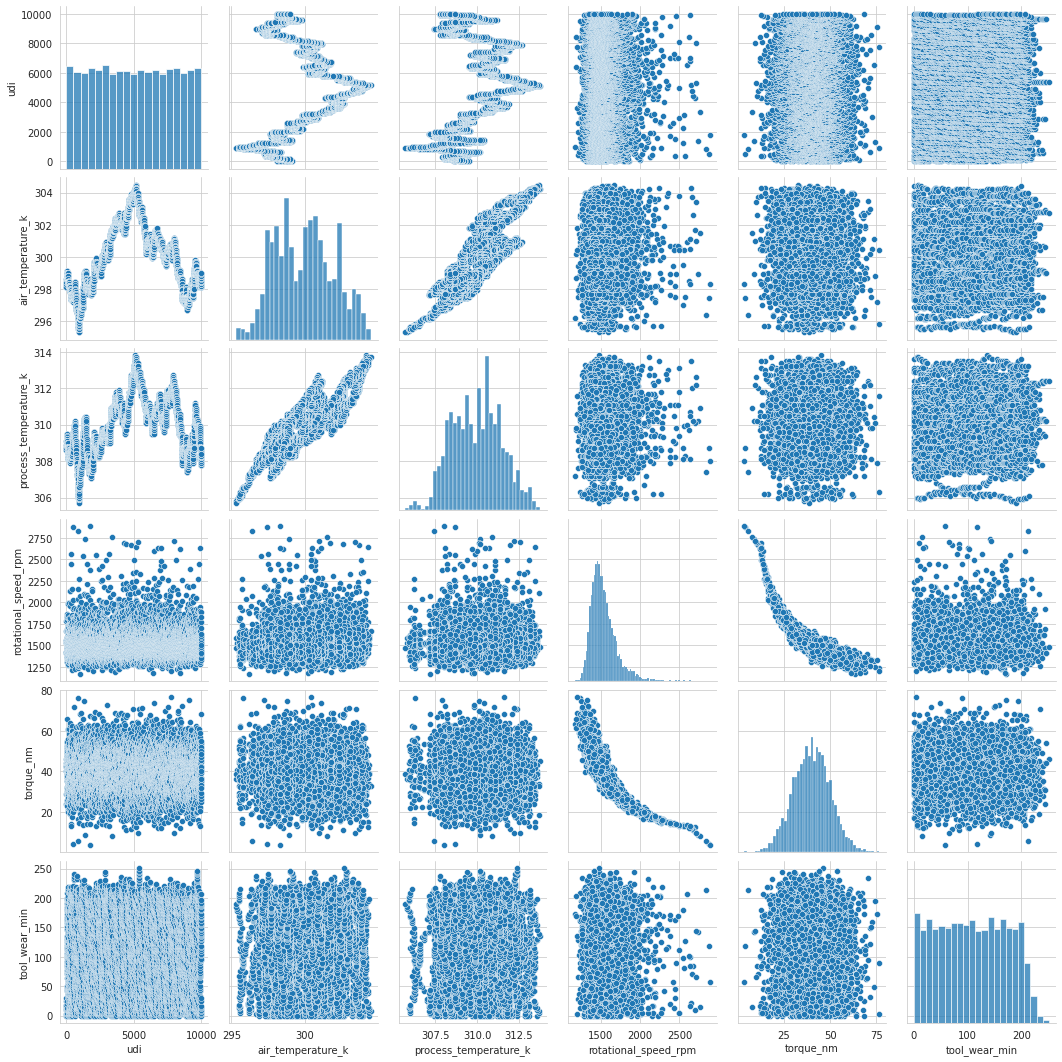

In [19]:
sn.pairplot(df_treino)
plt.show()